In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [2]:
'''ROOT_DIR = "/content/drive/MyDrive/Brain_Tumor_Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()'''

'ROOT_DIR = "/content/drive/MyDrive/Brain_Tumor_Dataset"\nnumber_of_images = {}\n\nfor dir in os.listdir(ROOT_DIR):\n  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))\n\nnumber_of_images.items()'

# Splitting the data such that

* 70% for Train data
* 15% for Validation
* 15% for Evaluation

In [3]:
# Creating Training folder
'''
if not os.path.exists('./train'):
  os.mkdir('.train')

  for dir in os.listdir(ROOT_DIR):
    os.makekirs('./train+dir')

    for img in np.random.choice(z=os.listdir(os.path.join(ROOT_DIR, dir,
                                                          size = (math.floor(70/100*number_of_images(dir))-2))))
'''

"\nif not os.path.exists('./train'):\n  os.mkdir('.train')\n\n  for dir in os.listdir(ROOT_DIR):\n    os.makekirs('./train+dir')\n\n    for img in np.random.choice(z=os.listdir(os.path.join(ROOT_DIR, dir,\n                                                          size = (math.floor(70/100*number_of_images(dir))-2))))\n"

In [4]:
def datafolder(p, split):
  # Creating Training folder

  if not os.path.exists('./'+p):
    os.mkdir('./'+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs('./'+p+'/'+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir) ),
                                  size = (math.floor(split*number_of_images[dir])-5),
                                  replace = False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join('./'+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f'{p}folder exist')

In [5]:
## datafolder('train', 0.7)  #Splitting 70% data for Training

In [6]:
ROOT_DIR = "/content/drive/MyDrive/train"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Negative', 1395), ('Positive', 2281)])

In [7]:
## datafolder('val', 0.15)   #Splitting 15% data for Validation

In [8]:
ROOT_DIR = "/content/drive/MyDrive/val"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Negative', 278), ('Positive', 487)])

In [9]:
## datafolder('test',0.15)   #Splitting 15% data for Testing

In [10]:
ROOT_DIR = "/content/drive/MyDrive/test"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Positive', 493), ('Negative', 303)])

In [46]:
train_data.class_indices

{'Negative': 0, 'Positive': 1}

# Model Buiding

In [11]:
pip install keras

In [12]:
import keras
print(keras.__version__)

3.4.1


In [13]:
pip install --upgrade keras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [11]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [15]:
# CNN Model

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),activation = 'relu',input_shape =(224,224,3)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.25))

# Flatten before passing to Dense layers
model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,635,361 (21.50 MB)

 Trainable params: 5,635,361 (21.50 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

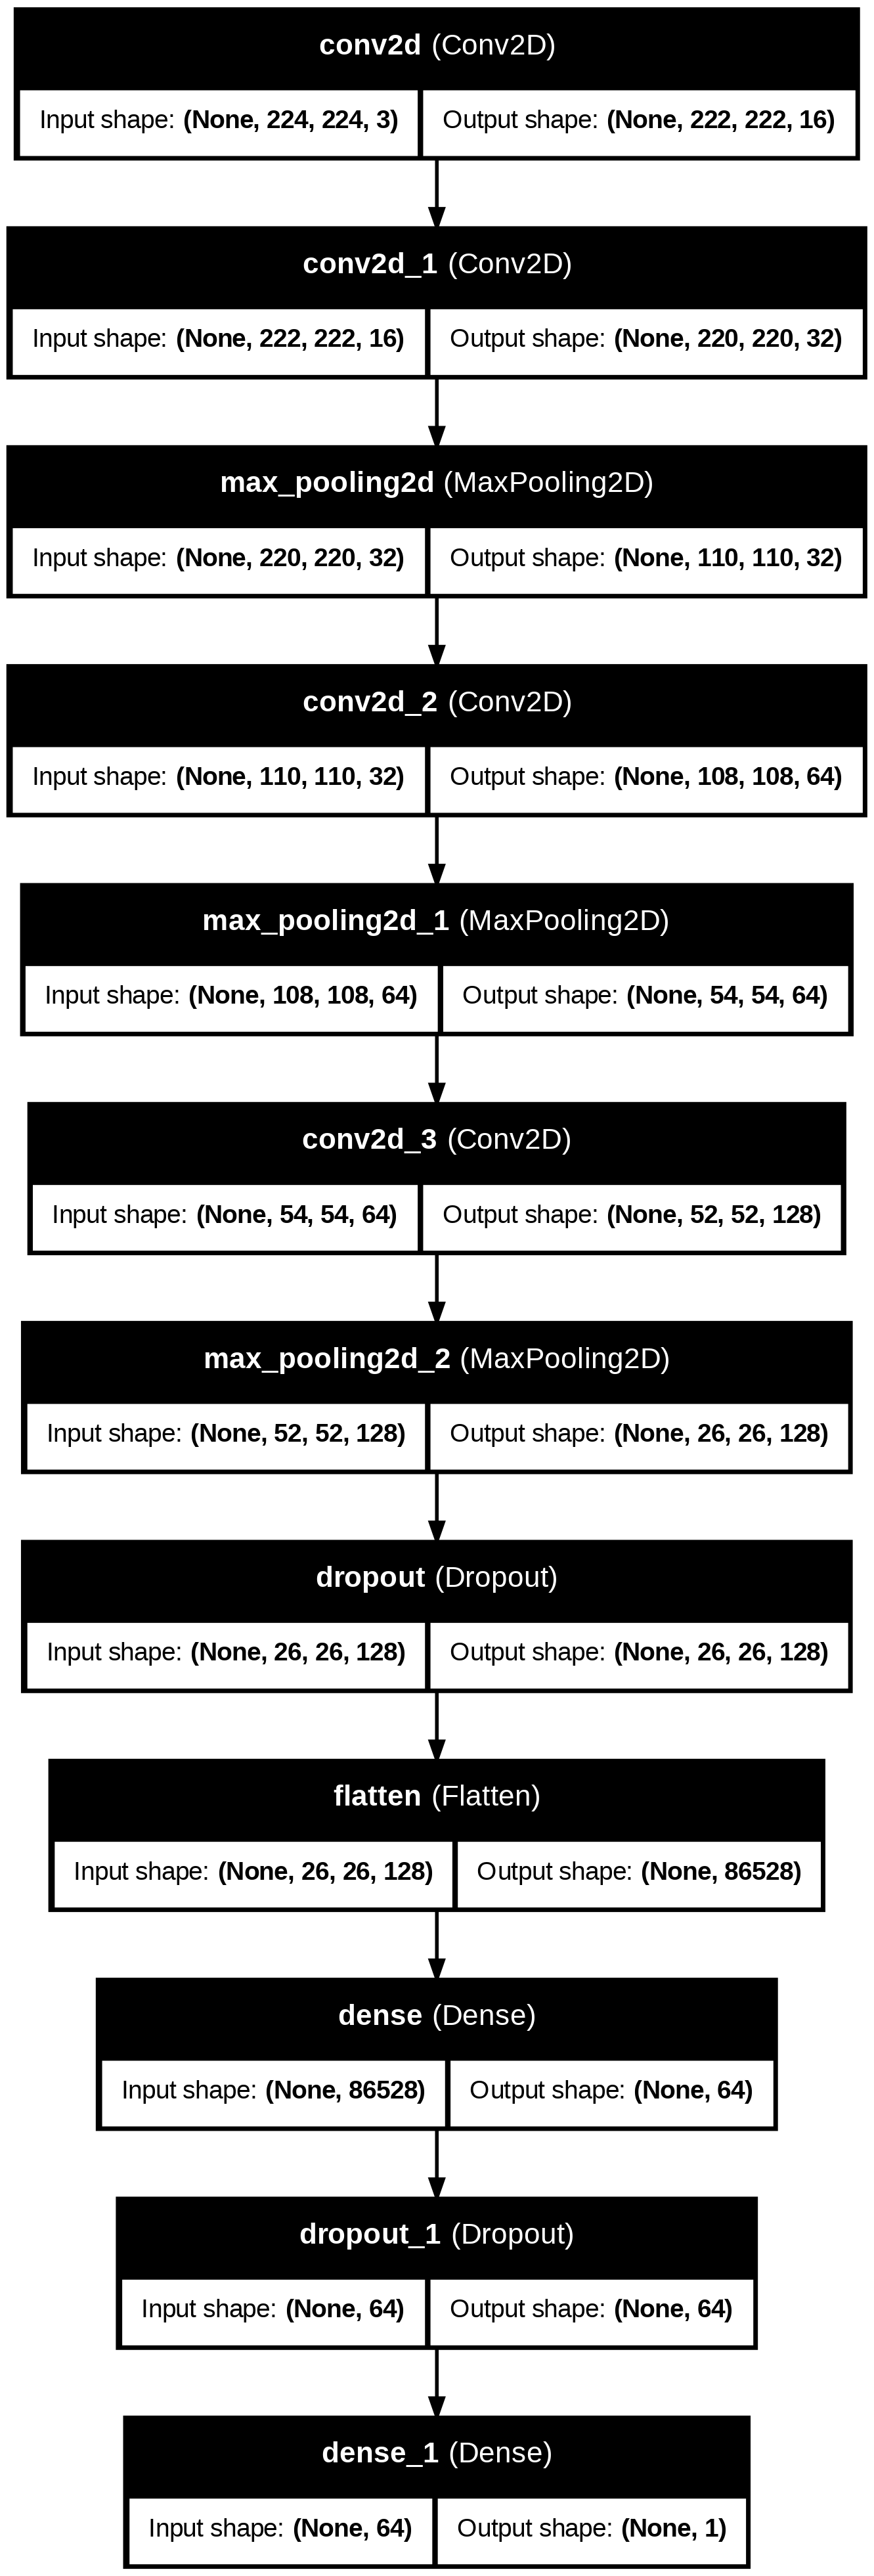

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Preparing our data using Data Generator

In [18]:
def preprocessingImages(path): # Data Augmentation
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range= 0.2, rescale = 1/255, horizontal_flip = True) # Increasing dimension for deep pattern
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [20]:
def preprocessingImages2(path):
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(rescale=1/255 )
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [21]:
path = '/content/drive/MyDrive/val'
val_data = preprocessingImages2(path)

Found 765 images belonging to 2 classes.


In [22]:
path = '/content/drive/MyDrive/test'
test_data = preprocessingImages2(path)

Found 796 images belonging to 2 classes.


In [23]:
# Early stopping and model check point
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 5, verbose =1,mode = 'auto')

# Model Checkpoint
#mc = ModelCheckpoint(monitor = 'val_accuracy', filepath='./bestmodel.h5', verbose =1, save_best_only = 'True', mode = 'auto')
mc = ModelCheckpoint(monitor='val_accuracy', filepath='./bestmodel.keras', verbose=1, save_best_only=True, mode='auto')
cd = [es,mc]

# Model Training

In [24]:
hs = model.fit(train_data,
                     steps_per_epoch = 8,
                     epochs = 30,
                     verbose = 1,
                     validation_data = val_data,
                     validation_steps = 16,
                     callbacks = cd)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  def workers(self):


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6281 - loss: 0.7748
Epoch 1: val_accuracy improved from -inf to 0.73438, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 282s 31s/step - accuracy: 0.6262 - loss: 0.7697 - val_accuracy: 0.7344 - val_loss: 0.6018
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6330 - loss: 0.5989
Epoch 2: val_accuracy improved from 0.73438 to 0.78656, saving model to ./bestmodel.keras


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 62s 9s/step - accuracy: 0.6417 - loss: 0.5936 - val_accuracy: 0.7866 - val_loss: 0.4204
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8011 - loss: 0.4446
Epoch 3: val_accuracy improved from 0.78656 to 0.79297, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 9s/step - accuracy: 0.7985 - loss: 0.4471 - val_accuracy: 0.7930 - val_loss: 0.4106
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.7699 - loss: 0.4898
Epoch 4: val_accuracy improved from 0.79297 to 0.84980, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7716 - loss: 0.4885 - val_accuracy: 0.8498 - val_loss: 0.3710
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8940 - loss: 0.3322
Epoch 5: val_accuracy improved from 0.84980 to 0.87695, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.8906 - loss: 0.3332 - val_accuracy: 0.8770 - val_loss: 0.3053
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━

In [25]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

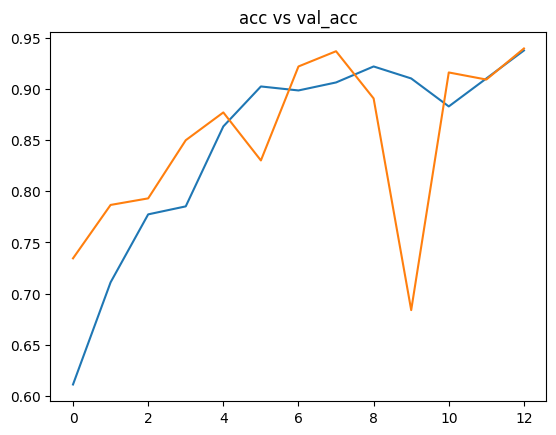

In [26]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.title('acc vs val_acc')
plt.show()

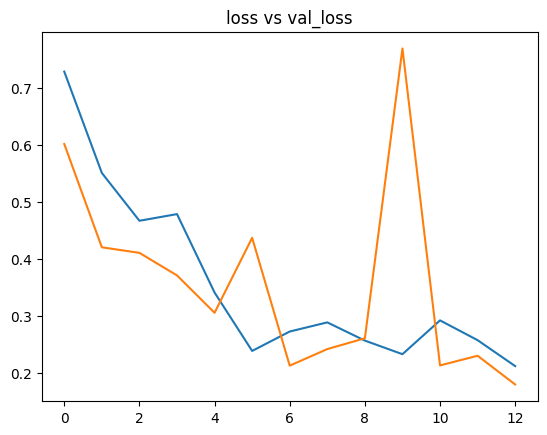

In [27]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'])

plt.title('loss vs val_loss')
plt.show()

In [29]:
# model accuracy

from keras.models import load_model

model = load_model('/content/bestmodel.keras')


# Model Accuracy

In [32]:
acc = model.evaluate(test_data)[1]
print(f'the accuracy of our model is {acc*100}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 250s 10s/step - accuracy: 0.9332 - loss: 0.1864
the accuracy of our model is 93.34170818328857%


In [33]:
from keras.preprocessing.image import load_img, img_to_array

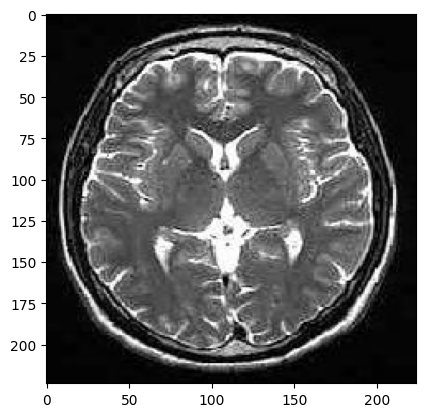

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The image is not having Tumour


In [45]:
# Testing model's performance from one single image by using img path
path ='/content/drive/MyDrive/train/Negative/Tr-no_0461.jpg '

img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = model.predict(input_arr)[0][0]
pred

if pred == 0:
  print('The image is having Tumour')
else:
  print('The image is not having Tumour')

# Out Model Accuracy is 93% which is fine, but not great
## So we need to do increase the model's accuracy

Image Preprocessing

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [2]:
def preprocessingImages(path): # Data Augmentation
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range= 0.2, preprocessing_function = preprocess_input, horizontal_flip = True) # Increasing dimension for deep pattern
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [3]:
def preprocessingImages2(path):
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(preprocessing_function = preprocess_input)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [22]:
path = '/content/drive/MyDrive/train'
train_data = preprocessingImages(path)

Found 3676 images belonging to 2 classes.


In [26]:
path = '/content/drive/MyDrive/test'
test_data = preprocessingImages2(path)

Found 796 images belonging to 2 classes.


In [6]:
path = '/content/drive/MyDrive/val'
val_data = preprocessingImages2(path)

Found 765 images belonging to 2 classes.


### Model Training

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications import MobileNet
import keras

In [8]:
base_model = MobileNet(input_shape = (224,224,3), include_top = False)

17225924/17225924 [==============================] - 0s 0us/step


In [9]:
for layer in base_model.layers:
  layer.trainable = False

In [15]:
X = Flatten()(base_model.output)
X = Dense(units = 1, activation  = 'sigmoid')(X)
model = Model(base_model.input, X)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [19]:
model.compile(optimizer = 'rmsprop',
              loss = keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [20]:
## call backs
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Model check point
mc = ModelCheckpoint(filepath = 'bestmodel.h5', monitor = 'val_accuracy', save_best_only = True)

# Early Stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

cb = [mc,es]

In [29]:
hist = model.fit(train_data,
          steps_per_epoch=8,
          epochs = 30,
          validation_data = val_data,
          validation_steps = 16,
          callbacks = cb)

Epoch 1/30
8/8 [==============================] - 26s 3s/step - loss: 0.6687 - accuracy: 0.9023 - val_loss: 0.4958 - val_accuracy: 0.9551
Epoch 2/30
8/8 [==============================] - 22s 3s/step - loss: 0.2597 - accuracy: 0.9570 - val_loss: 0.7881 - val_accuracy: 0.9258
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.9982 - accuracy: 0.8984

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 21s 3s/step - loss: 0.9982 - accuracy: 0.8984 - val_loss: 0.2483 - val_accuracy: 0.9668
Epoch 4/30
8/8 [==============================] - 22s 3s/step - loss: 0.6021 - accuracy: 0.9023 - val_loss: 0.3508 - val_accuracy: 0.9668
Epoch 5/30
8/8 [==============================] - 17s 2s/step - loss: 0.4308 - accuracy: 0.9609 - val_loss: 0.2552 - val_accuracy: 0.9688
Epoch 6/30
8/8 [==============================] - 18s 2s/step - loss: 0.0149 - accuracy: 0.9922 - val_loss: 0.3800 - val_accuracy: 0.9668
Epoch 6: early stopping


In [30]:
# load best fit model

model = load_model('/content/bestmodel.h5')

In [51]:
acc = model.evaluate(test_data)[1]
print(f'model accuracy is {acc*100}%')

25/25 [==============================] - 4s 154ms/step - loss: 0.1490 - accuracy: 0.9774
model accuracy is 97.73869514465332%


In [52]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

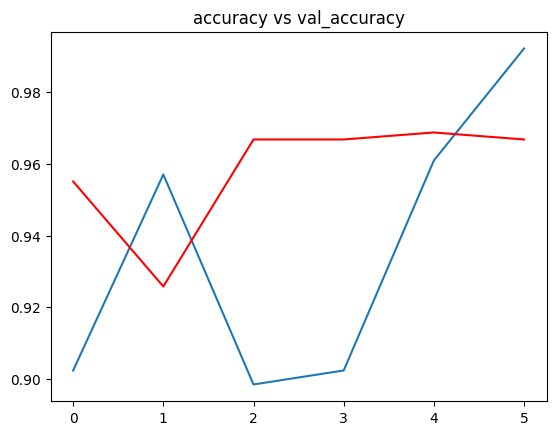

In [53]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c = 'red')
plt.title('accuracy vs val_accuracy')
plt.show()

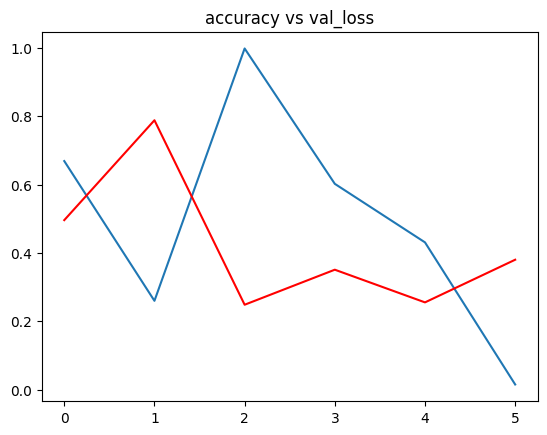

In [54]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = 'red')
plt.title('accuracy vs val_loss')
plt.show()

In [34]:
from keras.preprocessing import image

1/1 [==============================] - 0s 19ms/step


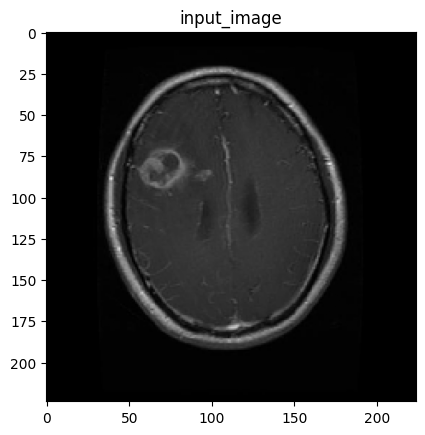

The image is having Tumour


In [55]:
# Testing model's performance from one single image by using img path
path ='/content/drive/MyDrive/test/Positive/Te-gl_0027.jpg'

img = image.load_img(path, target_size = (224,224))
i = image.img_to_array(img)/255
input_arr = np.array([i])

input_arr.shape

pred = np.argmax(model.predict(input_arr)) #

#To display the image
plt.imshow(input_arr[0])
plt.title('input_image')
plt.show()

if pred == 0:
  print('The image is having Tumour')
else:
  print('The image is not having Tumour')



1/1 [==============================] - 0s 20ms/step


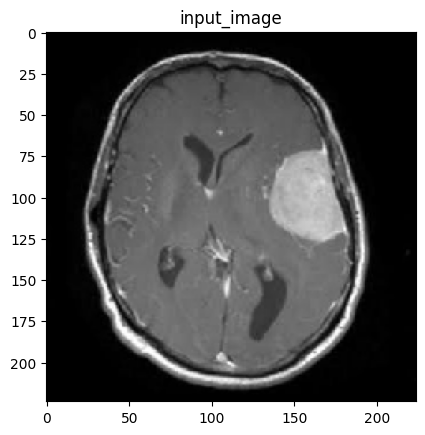

The image is having Tumour


In [58]:
# Testing model's performance from one single image by using img path
path ='/content/drive/MyDrive/test/Positive/Te-me_0040.jpg'

img = image.load_img(path, target_size = (224,224))
i = image.img_to_array(img)/255
input_arr = np.array([i])

input_arr.shape

pred = np.argmax(model.predict(input_arr)) #

#To display the image
plt.imshow(input_arr[0])
plt.title('input_image')
plt.show()

if pred == 0:
  print('The image is having Tumour')
else:
  print('The image is not having Tumour')